Dependencies

In [14]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import json

import pandas as pd
import matplotlib.pyplot as plt

Dataset laden

In [15]:
dataset = pd.read_csv('OwnDatasetTest.csv', delimiter=";", on_bad_lines='warn')

#print(dataset.iloc[:, 3])

texts = dataset.iloc[:, 0]
labels = dataset.iloc[:, 1]

print(texts)
print(labels)

0                Mach dir keine Sorgen, das passt schon.
1                Halte durch, das sieht schon super aus!
2                   Sei vorsichtig, die Pfanne ist heiß.
3      Herzlichen Glückwunsch, das ist wirklich gelun...
4                       Nicht aufgeben, du schaffst das!
                             ...                        
346                           Und schon sind wir fertig.
347                                 Das wars auch schon.
348              Lass dir dein leckeres Essen schmecken.
349                                  Genieße dein Essen.
350                           Das wars, wir sind fertig.
Name: instruction, Length: 351, dtype: object
0      Beruhigung
1      Motivation
2         Warnung
3          Freude
4      Motivation
          ...    
346        Freude
347        Freude
348        Freude
349        Freude
350        Freude
Name: Emotion, Length: 351, dtype: object


Visualisierung für Datensatz - Aufteilung nach Emotionen

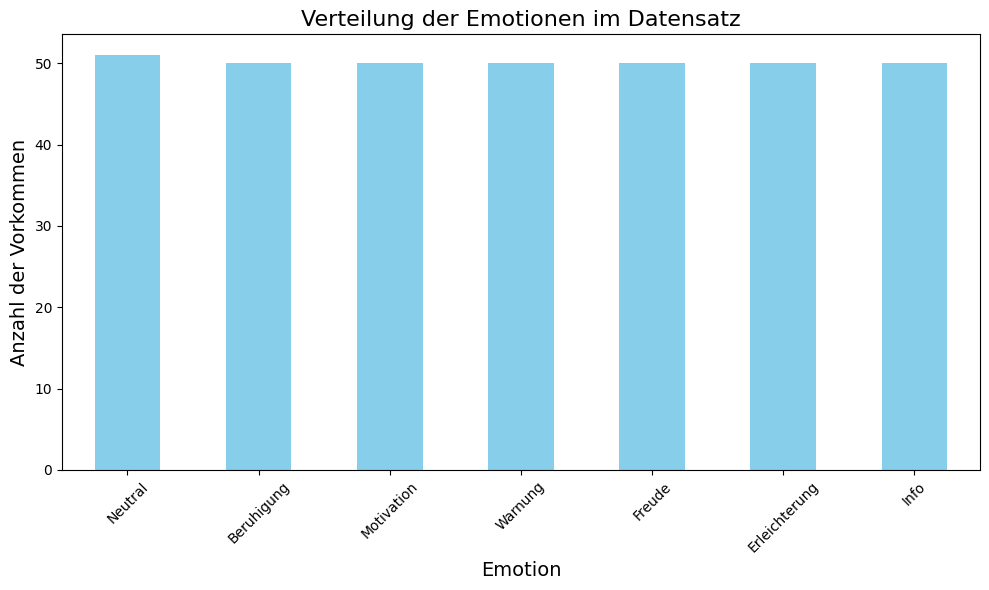

In [16]:
# Angenommen, die Labels (Emotionen) sind in der 'Label'-Spalte
emotion_counts = labels.value_counts()


# Balkendiagramm erstellen
plt.figure(figsize=(10,6))
emotion_counts.plot(kind='bar', color='skyblue')

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Verteilung der Emotionen im Datensatz', fontsize=16)
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Anzahl der Vorkommen', fontsize=14)

# Diagramm anzeigen
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ausbalancieren der Daten

In [17]:
print(len(emotion_counts))
print(emotion_counts)



7
Emotion
Neutral          51
Beruhigung       50
Motivation       50
Warnung          50
Freude           50
Erleichterung    50
Info             50
Name: count, dtype: int64


Visualisierung für Datensatz - Aufteilung Duplikate oder Unique

Anzahl der Datenpaare: 351
Eindeutige Paare: 350
Duplikate: 1


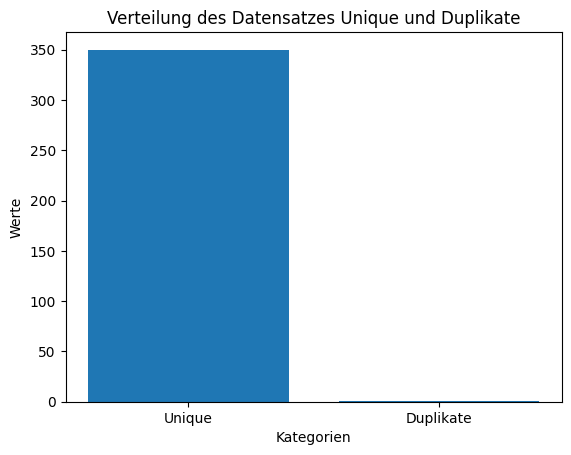

In [18]:
# Werte der zweiten und dritten Spalte ab Zeile 2 auswählen
werte_zweite_spalte = dataset.iloc[:, 0].values
werte_dritte_spalte = dataset.iloc[:, 1].values

# Paare aus den beiden Spalten bilden
data_pairs = list(zip(werte_zweite_spalte, werte_dritte_spalte))

print(f"Anzahl der Datenpaare: {len(data_pairs)}")

# Sets für eindeutige Paare und Duplikate initialisieren
unique_pairs = []
duplicates = []

# Paare durchgehen
for pair in data_pairs:
    if pair in unique_pairs:
        duplicates.append(pair)  # Wenn das Paar schon vorhanden ist, als Duplikat speichern
    else:
        unique_pairs.append(pair)  # Andernfalls zum Set der eindeutigen Paare hinzufügen

# Ergebnisse
print("Eindeutige Paare:", len(unique_pairs))
print("Duplikate:", len(duplicates))

#Diagramm zur Visualisierung
verteilungsLabels = ["Unique", "Duplikate"]
verteilungsValues = [len(unique_pairs), len(duplicates)]

# Balkendiagramm erstellen
plt.bar(verteilungsLabels, verteilungsValues)

# Diagramm beschriften
plt.xlabel('Kategorien')
plt.ylabel('Werte')
plt.title('Verteilung des Datensatzes Unique und Duplikate')

# Diagramm anzeigen
plt.show()

GloVe vorbereiten

In [19]:
# GloVe-Vektoren laden
embedding_index = {}
glove_file = 'glove.6B.100d.txt'
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs


Tokenizer erstellen

In [20]:
# Überprüfen der Daten
for i, text in enumerate(texts):
    if not isinstance(text, str):
        print(f"Ungültiger Typ in texts[{i}]: {text} (Typ: {type(text)})")

In [21]:
# Tokenizer vorbereiten und Texte in Zahlen umwandeln
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=50)  # Maximale Länge der Sequenz auf 50 setzen

#Tokenizer abspeichern
tokenizer_json = tokenizer.to_json()
with open("tokenizer.json", "w") as f:
    f.write(tokenizer_json)

# Label-Daten vorbereiten
# Emotionen in Zahlen umwandeln mit LabelEncoder
label_encoder = LabelEncoder()


encoded_label_sequence = label_encoder.fit_transform(labels)
labels_to_numbers = label_encoder.classes_ 
print(labels_to_numbers)
np.save('sentiment_labels_to_numbers.npy', labels_to_numbers)
print("_______")

# Trainiere den LabelEncoder auf den Emotionen
emotion_labels = label_encoder.fit_transform(labels)
mapping = dict(zip(labels, emotion_labels))
print("Label-Encoding der Emotionen:", mapping)

print("_________")
y = np.array(emotion_labels)
print(mapping)
print(y)

# Train-Test-Split
test_size = .2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

print(f"Trainsize: {len(X_train)} and Testsize: {len(X_test)}")

['Beruhigung' 'Erleichterung' 'Freude' 'Info' 'Motivation' 'Neutral'
 'Warnung']
_______
Label-Encoding der Emotionen: {'Beruhigung': 0, 'Motivation': 4, 'Warnung': 6, 'Freude': 2, 'Erleichterung': 1, 'Neutral': 5, 'Info': 3}
_________
{'Beruhigung': 0, 'Motivation': 4, 'Warnung': 6, 'Freude': 2, 'Erleichterung': 1, 'Neutral': 5, 'Info': 3}
[0 4 6 2 4 1 1 2 4 4 4 4 5 0 6 1 1 4 2 5 0 2 2 4 6 6 4 0 0 0 5 4 0 4 4 2 0
 0 6 0 0 6 0 0 5 2 5 6 5 0 6 0 6 4 5 2 5 6 5 5 6 3 5 3 5 5 3 3 2 5 3 5 2 3
 5 5 3 3 3 6 2 5 3 5 5 5 3 3 3 5 5 2 3 5 5 5 5 3 5 5 3 2 3 2 5 5 5 3 5 3 5
 6 2 6 3 3 3 3 3 3 5 5 3 5 5 5 2 3 5 5 3 5 5 2 5 5 5 5 5 5 5 5 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 

Modell

In [22]:
# Embedding-Matrix erstellen
embedding_dim = 100  # Dimension der GloVe-Vektoren
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
# Modellaufbau
model = Sequential()
# Embedding-Schicht: Vortrainierte GloVe-Embeddings
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, 
                    output_dim=embedding_dim, 
                    weights=[embedding_matrix], 
                    input_length=50, 
                    trainable=False))  # Embedding-Schicht wird nicht trainiert
# LSTM-Schicht
model.add(LSTM(128))  # LSTM mit 128 Neuronen
# Dropout-Schicht (zur Vermeidung von Overfitting)
model.add(Dropout(0.5))
# Dense-Schicht für die Klassifikation
model.add(Dense(len(emotion_counts), activation='softmax'))  # 6 Emotionen als Ausgabeklassen
# Modellkompilierung
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modellübersicht anzeigen
model.summary()

/Users/lucacataldo/Documents/Bachelor/Complete_App/Web/env_mac/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │        76,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,000 (296.88 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 76,000 (296.88 KB)

Trainieren des Modells

In [23]:
model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1896 - loss: 1.9294 - val_accuracy: 0.3803 - val_loss: 1.7696
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4227 - loss: 1.6948 - val_accuracy: 0.5070 - val_loss: 1.5214
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5288 - loss: 1.4454 - val_accuracy: 0.6056 - val_loss: 1.3368
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6218 - loss: 1.2025 - val_accuracy: 0.5915 - val_loss: 1.2929
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6004 - loss: 1.1262 - val_accuracy: 0.6479 - val_loss: 1.1693
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6843 - loss: 0.9577 - val_accuracy: 0.5634 - val_loss: 1.1890
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7247 - loss: 0.7930 - val_accuracy: 0.5775 - val_loss: 1.2582
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7693 - loss: 0.8153 - val_accuracy: 0.6620 - v

Überprüfen der Trainingswerte

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Vorhersagen mit X_test
y_pred = model.predict(X_test)

# Da es sich um ein Klassifikationsproblem handelt und das Modell eine Softmax-Aktivierung hat,
# müssen die Vorhersagen für die Multiklassenklassifikation in die Klasse mit der höchsten Wahrscheinlichkeit umgewandelt werden.
y_pred_classes = np.argmax(y_pred, axis=1)  # y_pred ist die Wahrscheinlichkeitsverteilung über die 

# Accuracy berechnen
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix berechnen
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Accuracy: 0.7042
Confusion Matrix:
[[11  1  0  1  1  0  0]
 [ 0  8  0  0  0  0  0]
 [ 1  0  4  1  1  1  0]
 [ 2  0  0  3  1  2  0]
 [ 2  1  1  0  7  0  2]
 [ 0  0  0  0  0  8  0]
 [ 1  1  0  1  0  0  9]]


Testen

In [33]:
def predictText(new_text, actual_label):
    print(f"Prediction für: {new_text}")
    # Schritt 1: Tokenisieren und Padding
    sequence = tokenizer.texts_to_sequences([new_text])  # Text in Sequenz umwandeln
    padded_sequence = pad_sequences(sequence, maxlen=50)  # Sequenz auf Länge 50 auffüllen

    # Schritt 2: Vorhersage machen
    prediction = model.predict(padded_sequence)

    # Schritt 3: Die Vorhersage interpretieren
    predicted_label = np.argmax(prediction)  # Index der höchsten Wahrscheinlichkeit

    # Zurückwandeln der predicteten numerischen Labels zur Emotion
    predicted_emotion = label_encoder.inverse_transform([predicted_label])[0]

    print(f"Vorhergesagte Emotion: {predicted_emotion} sollte {actual_label} sein.")
    print("___________________________________")

loadedRecepie =[
    ["Freude" ,"Genieße dein Werk."],
    ["Neutral" ,"Nimm das Messer und schneide das Fleisch in Würfel."],
    ["Warnung" ,"Achtung, das Öl ist sehr heiß!"],
    ["Motivation" ,"Das machst du super!"],
    ["Beruhigung" ,"Keine Sorge, das Rezept ist nicht schwer."],
    ["Info" ,"Lass alles erstmal abkühlen."],
    ["Warnung" ,"Das ist nicht gut."],
]

predictText(loadedRecepie[0][1],loadedRecepie[0][0])
predictText(loadedRecepie[1][1],loadedRecepie[1][0])
predictText(loadedRecepie[2][1],loadedRecepie[2][0])
predictText(loadedRecepie[3][1],loadedRecepie[3][0])
predictText(loadedRecepie[4][1],loadedRecepie[4][0])
predictText(loadedRecepie[5][1],loadedRecepie[5][0])
predictText(loadedRecepie[6][1],loadedRecepie[6][0])

Prediction für: Genieße dein Werk.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Vorhergesagte Emotion: Freude sollte Freude sein.
___________________________________
Prediction für: Nimm das Messer und schneide das Fleisch in Würfel.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Vorhergesagte Emotion: Neutral sollte Neutral sein.
___________________________________
Prediction für: Achtung, das Öl ist sehr heiß!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Vorhergesagte Emotion: Warnung sollte Warnung sein.
___________________________________
Prediction für: Das machst du super!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Vorhergesagte Emotion: Motivation sollte Motivation sein.
___________________________________
Prediction für: Keine Sorge, das Rezept ist nicht schwer.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Vorhergesagte Emotion: Beruhigung sollte Beruhigung sein.
___________________________________
Prediction für: Lass alles erstmal abkühlen.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Vorhergesagte Emotion: Beruhigun

Modell speichern

In [26]:

# Modell speichern
model.save('Sentiment_AI_GloVe.h5')